# Prikaz mjerenja visine


In [1]:
# Pripremi Python okruzenje.

# IPython
from IPython import *
from IPython.display import *

# SciPy paketi
import numpy as np
import matplotlib.pyplot as plt

# Postavi stil grafova na `ggplot'.
plt.style.use('ggplot')


## Unos rezultata mjerenja


Mjerenja visine spremit ćemo u objekt *NumPy* klase `array` tako da je svako mjerenje zadano uređenim parom $ \left( t , h \right) $ gdje je $ t $ datum mjerenja, a $ h $ rezultat mjerenja. Datume mjerenja izrazit ćemo *NumPy* klasom `datetime64`, a rezultat mjerenja realnim brojem (`numpy.dtype('float64')`) vrijednosti visine u $ \mathrm{cm} $. Logično, mjerenja ćemo spremiti redoslijedom kojim su izvršena, to jest, od onog s najranijim datumom redom do onog s najkasnijim datumom.

Stoga, unesimo rezultate mjerenja!


In [2]:
# Spremi rezultate mjerenja s datumima mjerenja u objekt `mjerenja'.
mjerenja = np.array(
    [('2007-10-28', 145),
     ('2008-03-28', 148.75),
     ('2008-05-18', 151),
     ('2008-09-01', 153.5),
     ('2008-11-01', 155.5),
     ('2009-05-01', 160),
     ('2009-11-18', 163),
     ('2010-10-12', 165.5),
     ('2011-05-15', 169),
     ('2012-06-04', 170),
     ('2013-04-21', 170.5)],
    dtype = [('datum', 'datetime64[D]'), ('visina', 'float64')]
)


Prije nego ih grafički prikažemo, provjerimo jesu li se mjerenja dobro spremila.

In [3]:
mjerenja


array([('2007-10-28', 145.  ), ('2008-03-28', 148.75),
       ('2008-05-18', 151.  ), ('2008-09-01', 153.5 ),
       ('2008-11-01', 155.5 ), ('2009-05-01', 160.  ),
       ('2009-11-18', 163.  ), ('2010-10-12', 165.5 ),
       ('2011-05-15', 169.  ), ('2012-06-04', 170.  ),
       ('2013-04-21', 170.5 )],
      dtype=[('datum', '<M8[D]'), ('visina', '<f8')])

In [4]:
mjerenja['datum']


array(['2007-10-28', '2008-03-28', '2008-05-18', '2008-09-01',
       '2008-11-01', '2009-05-01', '2009-11-18', '2010-10-12',
       '2011-05-15', '2012-06-04', '2013-04-21'], dtype='datetime64[D]')

In [5]:
mjerenja['visina']


array([145.  , 148.75, 151.  , 153.5 , 155.5 , 160.  , 163.  , 165.5 ,
       169.  , 170.  , 170.5 ])

## Grafički prikaz rezultata mjerenja


Sada kada smo sigurni da su se mjerenja dobro spremila, prikažimo ih grafički. Budući da smo za datume koristili *NumPy* klasu `datetime64`, možemo biti sigurni da će po $ x $-osi (na kojoj će biti prikazani datumi) točke biti adekvatno udaljene (da smo datume izrazili samo *stringom*, razmak bi između dva susjedna mjerenja bio konstantan, neovisno o stvarnom vremenskom pomaku između datuma tih mjerenja). Stvarna mjerenja jasno ćemo izraziti na grafu, ali ćemo susjedna mjerenja spajati ravnim linijama (linearni *spline*) kao aproksimaciju progresije visine kroz vrijeme između mjerenja.


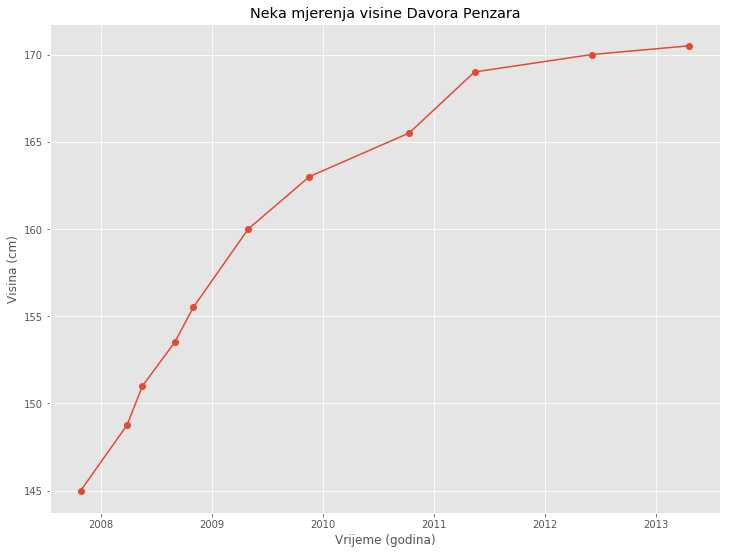

In [6]:
# Pripremi okruzenje za prikaz grafa.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 9), num = 'Prikaz mjerenja visine')

# Postavi tekst objasnjenja na graf.
ax.set_title('Neka mjerenja visine Davora Penzara')
ax.set_xlabel('Vrijeme (godina)')
ax.set_ylabel('Visina (cm)')

# Prikazi mjerenja na grafu.
ax.plot(mjerenja['datum'], mjerenja['visina'], marker = 'o', linestyle = '-')


Konačno, grafičke prikaze spremimo u vanjske datoteke radi mogućnosti distribuiranja. Možemo ih odmah spremiti u vektorskom obliku i rasterizirane na fiksnu rezoluciju.


In [7]:
fig.savefig('prikaz_mjerenja.pdf') # vektorski PDF
fig.savefig('prikaz_mjerenja.png') # rasterizirani PNG
